<h1 style="text-align: center; color: white"> Plotting from text files </h1>

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import jra_nprat
import warnings
from scipy.integrate import simps
from scipy.integrate import quad
import pandas as pd
from summary_dictionary import ryan_data, nadia_data
from abhyuday_data import abhyuday_data
from scipy.interpolate import interp1d
import scipy.constants as const
from scipy.constants import physical_constants

<h2 style="text-align: center; color: gold"> Reading My Summary File </h2>

In [90]:
data = []

with open('fullsummaryfile_nadiacommon.txt', 'r') as f:
    for line in f:
        if not line.startswith('#'):
            values = line.split()
            row = [
                values[0],                      # Target
                float(values[1]),               # femccls
                float(values[2]),               # femcmf
                float(values[3]),               # femcke
                float(values[4]),               # femcdens
                int(values[5])                  # A
            ]
            data.append(row)

# Sort the data by the last element in each row (A values)
data_sorted = sorted(data, key = lambda x: x[-1])
data_sorted_np = np.array(data_sorted, dtype = object)

c_cls = abhyuday_data["c12"]["EMC_close"]
c_mf = abhyuday_data["c12"]["EMC_momfrac"]
c_ke = abhyuday_data["c12"]["EMC_ke"]
c_dens = abhyuday_data["c12"]["EMC_dens"]

# Convert specific columns to float
data_sorted_np[:, 1] = data_sorted_np[:, 1].astype(float) # femccls
data_sorted_np[:, 2] = data_sorted_np[:, 2].astype(float) # femcmf
data_sorted_np[:, 3] = data_sorted_np[:, 3].astype(float) # femcke
data_sorted_np[:, 4] = data_sorted_np[:, 4].astype(float) # femcdens
data_sorted_np[:, -1] = data_sorted_np[:, -1].astype(int)  # Last column (A)

femcls = data_sorted_np[:, 1]
femcmf = data_sorted_np[:, 2]
femcke = data_sorted_np[:, 3]
femcdens = data_sorted_np[:, 4]
A = data_sorted_np[:, -1]

femcls_norm = np.zeros(len(A))
femcmf_norm = np.zeros(len(A))
fermcke_norm = np.zeros(len(A))
femcdens_norm = np.zeros(len(A))

# Deuterium subtracted and carbon normalized
for i in range(len(A)):
    femcls_norm[i] = abs(femcls[i] +  (-1.1379e-13)) / (c_cls - 1.1379e-13)
    femcmf_norm[i] = abs(femcmf[i] + (-3.2667e-03)) / (c_mf - 3.2667e-03)
    fermcke_norm[i] = abs(femcke[i] + (-1.0000e-03)) / (c_ke - 1.0000e-03)
    femcdens_norm[i] = abs(femcdens[i] + (-4.0000e-02)) / (c_dens - 4.0000e-02)

<h2 style="text-align: center; color: gold"> Plotting my fake EMC slopes </h2>

In [91]:
# fig, ax = plt.subplots()
# ax.plot(A[A<=12], femcls_norm[A<=12], label = 'Closeness', color = 'blue', marker = 'o')
# ax.plot(A[A<=12], femcmf_norm[A<=12], label = 'Momentum Fraction', color = 'red', marker = 's')
# ax.plot(A[A<=12], fermcke_norm[A<=12], label = 'Kinetic Energy', color = 'green', marker = '^')
# ax.plot(A[A<=12], femcdens_norm[A<=12], label = 'Density', color = 'gold', marker = 'x')
# ax.set_xlabel('A')
# ax.set_ylabel('fake EMC Effect (C12 normalized and D subtracted)')
# ax.legend()
# ax.grid(alpha = 0.2)
# ax.savefig(f'plots/fakeEMC_deutsub_c12norm{time.time():.0f}.png', dpi = 300)

<h2 style="text-align: center; color: lightblue"> Reading Nadia's fake EMC slopes </h2>

In [92]:
# Load data (assuming space-delimited and no header in data file)
data = pd.read_csv("Nadia_stuff/consolidated_slopes_sorted_kefixed.dat", delim_whitespace=True, header=None)

# Apply x and y calculations
x_values = data[1] + data[2]
x_values = x_values + 0.1  # Offset x-values by 1.1
mask = x_values < 13  # Filter based on x-value < 13
x_values = x_values[mask]  # Filtered x values

# Calculate y-values for each line using the respective columns and scaling factors
mom_frac_y = abs(data[3] - data[11]) / 0.0799663
closeness_y = abs(data[5] - data[12]) / 0.026467
density_y = abs(data[7] - data[13]) / 0.048667
kinetic_energy_y = abs(data[9] - data[14]) / 0.0023

# Apply mask to y-values
mom_frac_y = mom_frac_y[mask]
closeness_y = closeness_y[mask]
density_y = density_y[mask]
kinetic_energy_y = kinetic_energy_y[mask]

/var/folders/_8/jr423pqd4ld_d5cxmtbz54_00000gn/T/ipykernel_85015/2514634100.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Nadia_stuff/consolidated_slopes_sorted_kefixed.dat", delim_whitespace=True, header=None)


In [93]:
8.3233e-02 - 3.2667e-03

0.0799663

<h2 style="text-align: center; color: red"> प्लॉट काट दे </h2>

[3 3 4 8 9 10 11 12 12]
0     2.1
1     3.1
2     3.1
3     4.1
4     8.1
5     9.1
6    12.1
7    10.1
8    11.1
9    12.1
dtype: float64


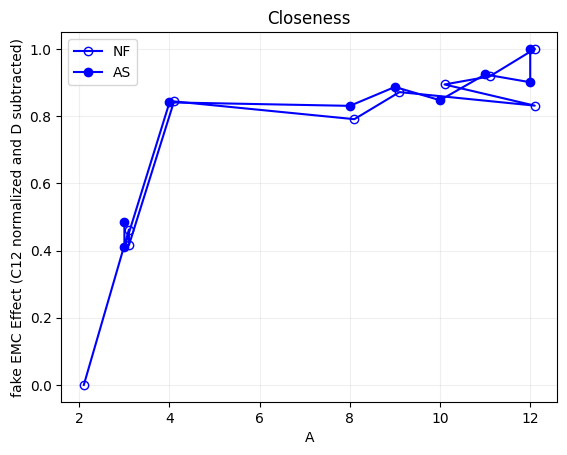

In [94]:
plt.plot(x_values, closeness_y, label = "NF", marker = 'o', color = 'blue', markerfacecolor = 'none')
plt.plot(A[A<=12], femcls_norm[A<=12], label = 'AS', color = 'blue', marker = 'o')
plt.xlabel('A')
plt.ylabel('fake EMC Effect (C12 normalized and D subtracted)')
plt.title('Closeness')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'plots/fakeEMC_closeness_deutsub_c12norm{time.time():.0f}.png', dpi = 300)

print(A[A<=12])
print(x_values)

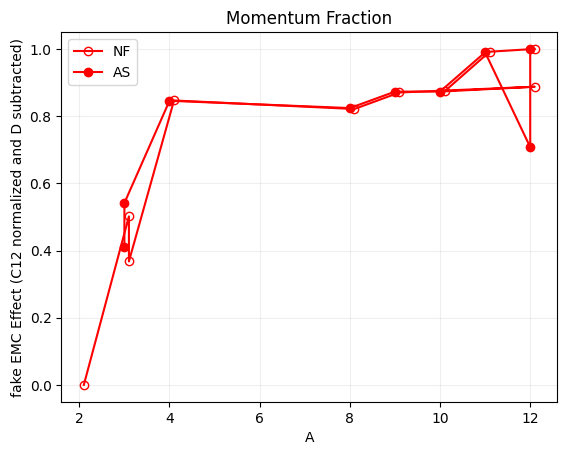

In [95]:
plt.plot(x_values, mom_frac_y, label = "NF", marker = 'o', color = 'red', markerfacecolor = 'none')
plt.plot(A[A<=12], femcmf_norm[A<=12], label = 'AS', color = 'red', marker = 'o')
plt.xlabel('A')
plt.ylabel('fake EMC Effect (C12 normalized and D subtracted)')
plt.title('Momentum Fraction')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'plots/fakeEMC_momentum_fraction_deutsub_c12norm{time.time():.0f}.png', dpi = 300)

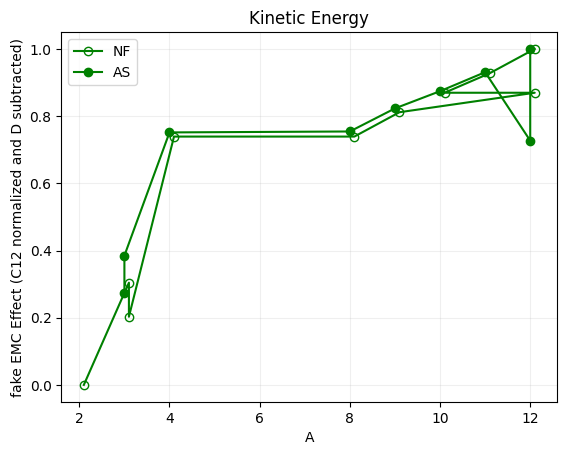

In [96]:
plt.plot(x_values, kinetic_energy_y, label = "NF", marker = 'o', color = 'green', markerfacecolor = 'none')
plt.plot(A[A<=12], fermcke_norm[A<=12], label = 'AS', color = 'green', marker = 'o')
plt.xlabel('A')
plt.ylabel('fake EMC Effect (C12 normalized and D subtracted)')
plt.title('Kinetic Energy')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'plots/fakeEMC_kinetic_energy_deutsub_c12norm{time.time():.0f}.png', dpi = 300)

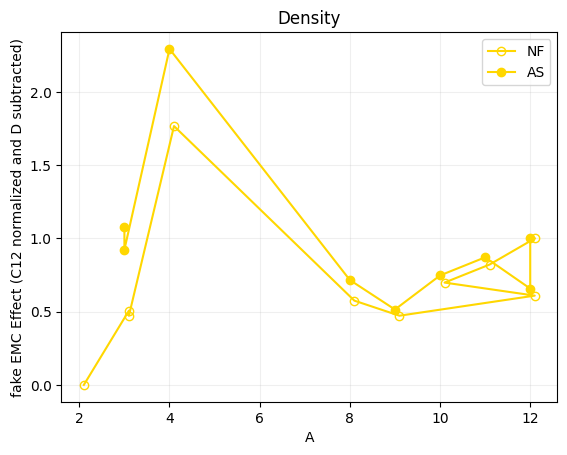

In [97]:
plt.plot(x_values, density_y, label = "NF", marker = 'o', color = 'gold', markerfacecolor = 'none')
plt.plot(A[A<=12], femcdens_norm[A<=12], label = 'AS', color = 'gold', marker = 'o')
plt.xlabel('A')
plt.ylabel('fake EMC Effect (C12 normalized and D subtracted)')
plt.title('Density')
plt.grid(alpha = 0.2)
plt.legend()
plt.savefig(f'plots/fakeEMC_density_deutsub_c12norm{time.time():.0f}.png', dpi = 300)

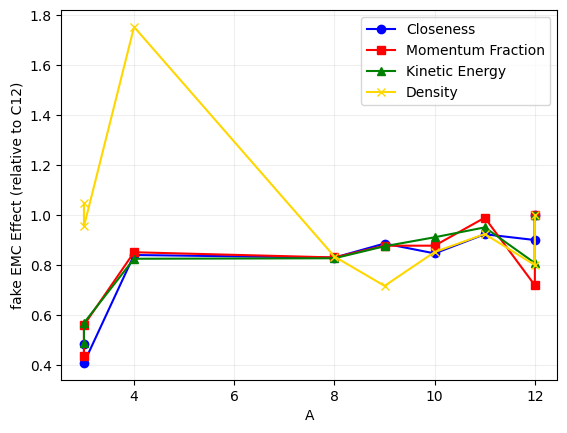

In [98]:
plt.plot(A[A<=12], femcls[A<=12] / c_cls, label = 'Closeness', color = 'blue', marker = 'o')
plt.plot(A[A<=12], femcmf[A<=12] / c_mf, label = 'Momentum Fraction', color = 'red', marker = 's')
plt.plot(A[A<=12], femcke[A<=12] / c_ke, label = 'Kinetic Energy', color = 'green', marker = '^')
plt.plot(A[A<=12], femcdens[A<=12] / c_dens, label = 'Density', color = 'gold', marker = 'x')
plt.xlabel('A')
plt.ylabel('fake EMC Effect (relative to C12)')
plt.legend()
plt.grid(alpha = 0.2)